<div class="alert alert-success">    
    <h1 style="direction: rtl;text-align:center;font-family:B Roya;font-size: 40px;">هوش مصنوعی</h1>
    <h2 style="direction: rtl;text-align:center;font-family:B Roya;font-size: 25px;">مجید محبی</h2>
    <h3 style="direction: rtl;text-align:center;font-family:B Roya;font-size: 20px;">دانشکده مهندسی برق و کامپیوتر دانشگاه زنجان</h3>
    <h4 style="direction: rtl;text-align:center;font-family:B Roya;font-size: 18px;">بهار 1404</h4>
</div>

<h4 style="charset:utf-8; lang:fa-IR; direction: rtl;text-align:right;font-family:B Roya;font-size: 22px;color:RGB(127,96,0)">

<body> 
پروژه دوم: طراحی سیستم زمان‌بندی دروس با الگوریتم ژنتیک  
</body> 

</h4>

<h4 style="charset:utf-8; lang:fa-IR; direction: rtl;text-align:right;font-family:B Roya;font-size: 18px;color:RGB(127,96,0)">

<body>
نام و نام خانوادگی
<br>

</body> 

</h4>

<h4 style="charset:utf-8; lang:fa-IR; direction: rtl;text-align:right;font-family:B Roya;font-size: 18px;color:RGB(127,96,0)">

<body>
شماره دانشجویی
<br>

</body> 

</h4>

In [1]:
#400463126-Zeinab Khosravi

Generation 0, Best Fitness: 16
Generation 1, Best Fitness: 11
Generation 2, Best Fitness: 10
Generation 3, Best Fitness: 10
Generation 4, Best Fitness: 8
Generation 5, Best Fitness: 8
Generation 6, Best Fitness: 8
Generation 7, Best Fitness: 8
Generation 8, Best Fitness: 8
Generation 9, Best Fitness: 8
Generation 10, Best Fitness: 8
Generation 11, Best Fitness: 8
Generation 12, Best Fitness: 8
Generation 13, Best Fitness: 8
Generation 14, Best Fitness: 8
Generation 15, Best Fitness: 8
Generation 16, Best Fitness: 8
Generation 17, Best Fitness: 7
Generation 18, Best Fitness: 7
Generation 19, Best Fitness: 7
Generation 20, Best Fitness: 7
Generation 21, Best Fitness: 7
Generation 22, Best Fitness: 7
Generation 23, Best Fitness: 7
Generation 24, Best Fitness: 6
Generation 25, Best Fitness: 6
Generation 26, Best Fitness: 6
Generation 27, Best Fitness: 6
Generation 28, Best Fitness: 6
Generation 29, Best Fitness: 6
Generation 30, Best Fitness: 6
Generation 31, Best Fitness: 6
Generation 32,

,Lesson ID,Professor,Time Slot,Room
0,D1,Prof1,Wed-12-14,Room5
1,D2,Prof10,Mon-16-18,Room2
2,D3,Prof2,Mon-10-12,Room3
3,D4,Prof10,Sat-10-12,Room5
4,D5,Prof5,Sat-08-10,Room5
5,D6,Prof8,Sat-16-18,Room2
6,D7,Prof5,Sat-14-16,Room1
7,D8,Prof4,Wed-16-18,Room1
8,D9,Prof2,Wed-10-12,Room4
9,D10,Prof1,Sat-10-12,Room4



Final Conflicts: 0

Genetic Algorithm Summary:

- **Success Status**: Successful (0 conflicts achieved)
- **Parameters**:
  - Number of Lessons: 20
  - Number of Students: 50
  - Number of Classrooms: 5
  - Population Size: 100
  - Generations per Restart: 452
  - Mutation Rate: 0.2
  - Restarts: 1
  - Tournament Size: 5
- **Total Generations Processed**: 376
- **Program Runtime**: 22.02 seconds



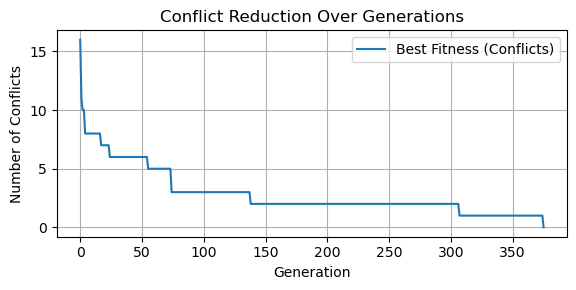

In [18]:
import random
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import time
import uuid

# Start timing
start_time = time.time()

NUM_LESSONS = 20
NUM_STUDENTS = 50
NUM_CLASSES = 5
POPULATION_SIZE = 100
GENERATIONS = 452
MUTATION_RATE = 0.2
RESTARTS = 1

days = ['Sat', 'Mon', 'Wed']
slots_per_day = ['08-10', '10-12', '12-14', '14-16', '16-18']
time_slots = [f"{d}-{s}" for d in days for s in slots_per_day]

classrooms = [
    {'id': f'Room{i+1}', 'capacity': cap}
    for i, cap in enumerate([25, 30, 35, 40, 50])
]

random.seed(42)
lessons = []
for i in range(NUM_LESSONS):
    allowed_slots = random.sample(time_slots, k=random.randint(10, 13))
    professor = f'Prof{random.randint(1, 10)}'
    lessons.append({
        'id': f'D{i+1}',
        'duration': random.choice([1, 1.5, 2]),
        'professor': professor,
        'available_slots': allowed_slots
    })

students = []
all_lessons = [l['id'] for l in lessons]
for i in range(NUM_STUDENTS):
    students.append({
        'id': f'S{i+1}',
        'lessons': random.sample(all_lessons, k=random.randint(3, 6))
    })

def generate_chromosome(lessons, time_slots, classrooms):
    chromosome = []
    for lesson in lessons:
        chromosome.append({
            'lesson_id': lesson['id'],
            'professor': lesson['professor'],
            'time_slot': random.choice(lesson['available_slots']),
            'room_id': random.choice(classrooms)['id']
        })
    return chromosome

def calculate_fitness(chromosome):
    time_conflicts = 0
    capacity_conflicts = 0
    professor_conflicts = 0

    for student in students:
        seen_slots = {}
        for lesson_id in student['lessons']:
            for gene in chromosome:
                if gene['lesson_id'] == lesson_id:
                    ts = gene['time_slot']
                    if ts in seen_slots:
                        time_conflicts += 1
                    else:
                        seen_slots[ts] = True

    for room in classrooms:
        room_id = room['id']
        student_count = {ts: 0 for ts in time_slots}
        for gene in chromosome:
            ts = gene['time_slot']
            if gene['room_id'] == room_id:
                for student in students:
                    if gene['lesson_id'] in student['lessons']:
                        student_count[ts] += 1
        for ts in time_slots:
            if student_count[ts] > room['capacity']:
                capacity_conflicts += (student_count[ts] - room['capacity'])

    professor_schedule = {}
    for gene in chromosome:
        prof = gene['professor']
        ts = gene['time_slot']
        if prof not in professor_schedule:
            professor_schedule[prof] = set()
        if ts in professor_schedule[prof]:
            professor_conflicts += 1
        else:
            professor_schedule[prof].add(ts)

    return time_conflicts + capacity_conflicts + professor_conflicts

def select_parents(population):
    tournament_size = 5
    tournament = random.sample(population, tournament_size)
    return min(tournament, key=lambda x: x['fitness'])['chromosome']

def crossover(parent1, parent2):
    child = []
    for i in range(len(parent1)):
        chosen = parent1[i] if random.random() < 0.5 else parent2[i]
        child.append(chosen.copy())
    return child

def mutate(chromosome):
    for gene in chromosome:
        if random.random() < MUTATION_RATE:
            lesson_idx = int(gene['lesson_id'][1:]) - 1
            gene['time_slot'] = random.choice(lessons[lesson_idx]['available_slots'])
            gene['room_id'] = random.choice(classrooms)['id']

def genetic_algorithm():
    best_solution = None
    best_fitness = float('inf')
    fitness_history = []
    total_generations = 0

    for restart in range(RESTARTS):
        population = [{'chromosome': generate_chromosome(lessons, time_slots, classrooms), 'fitness': 0} for _ in range(POPULATION_SIZE)]

        for generation in range(GENERATIONS):
            for individual in population:
                individual['fitness'] = calculate_fitness(individual['chromosome'])

            best_individual = min(population, key=lambda x: x['fitness'])
            current_best_fitness = best_individual['fitness']
            fitness_history.append((total_generations, current_best_fitness))
            print(f"Generation {generation}, Best Fitness: {current_best_fitness}")
            total_generations += 1

            if current_best_fitness == 0:
                return best_individual['chromosome'], fitness_history, total_generations

            if current_best_fitness < best_fitness:
                best_fitness = current_best_fitness
                best_solution = best_individual['chromosome'].copy()

            new_population = [{'chromosome': best_solution.copy(), 'fitness': best_fitness}]
            while len(new_population) < POPULATION_SIZE:
                p1 = select_parents(population)
                p2 = select_parents(population)
                child = crossover(p1, p2)
                mutate(child)
                new_population.append({'chromosome': child, 'fitness': 0})

            population = new_population

        if best_fitness == 0:
            break

    return best_solution, fitness_history, total_generations

final_schedule, fitness_history, total_generations = genetic_algorithm()

# Calculate runtime
end_time = time.time()
runtime = end_time - start_time

print("\nFinal Schedule:")
schedule_data = [(gene['lesson_id'], gene['professor'], gene['time_slot'], gene['room_id']) for gene in final_schedule]
df = pd.DataFrame(schedule_data, columns=['Lesson ID', 'Professor', 'Time Slot', 'Room'])
display(df.style.set_properties(**{'text-align': 'left', 'direction': 'ltr', 'font-family': 'Arial'}))

final_conflicts = calculate_fitness(final_schedule)
print(f"\nFinal Conflicts: {final_conflicts}")

# Generate summary
print("\nGenetic Algorithm Summary:")
success_status = "Successful (0 conflicts achieved)" if final_conflicts == 0 else f"Not Successful ({final_conflicts} conflicts remain)"
summary = f"""
- **Success Status**: {success_status}
- **Parameters**:
  - Number of Lessons: {NUM_LESSONS}
  - Number of Students: {NUM_STUDENTS}
  - Number of Classrooms: {NUM_CLASSES}
  - Population Size: {POPULATION_SIZE}
  - Generations per Restart: {GENERATIONS}
  - Mutation Rate: {MUTATION_RATE}
  - Restarts: {RESTARTS}
  - Tournament Size: 5
- **Total Generations Processed**: {total_generations}
- **Program Runtime**: {runtime:.2f} seconds
"""
print(summary)

generations, fitnesses = zip(*fitness_history)
plt.figure(figsize=(6, 3))
plt.plot(generations, fitnesses, label='Best Fitness (Conflicts)', color='#1f77b4')
plt.xlabel('Generation')
plt.ylabel('Number of Conflicts')
plt.title('Conflict Reduction Over Generations')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()